In [3]:
import numpy as np
from astropy.io import fits
from astropy import units as U
from pydl.pydlutils.spheregroup import spherematch
# -- iQuench -- 
from letstalkaboutquench import util as UT

read in Jeremy's catalog

In [15]:
tinker_ra, tinker_dec = np.loadtxt(''.join([UT.dat_dir(), 'central_positions_tinker_SDSS.dat']), 
                                   skiprows=2, unpack=True, usecols=[0,1])

In [16]:
tinker = np.loadtxt(''.join([UT.dat_dir(), 'tinker_SDSS_centrals_M9.7.dat']))

In [21]:
tinker_cz = np.loadtxt(''.join([UT.dat_dir(), 'tinker_SDSS_centrals_M9.7_pos.dat']), 
                       skiprows=2, unpack=True, usecols=[18])

In [22]:
tinker_z = tinker_cz / 299792.

Text(0,0.5,'Dec')

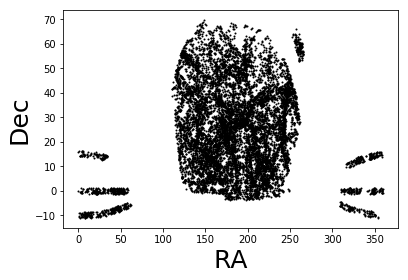

In [23]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(tinker_ra, tinker_dec, s=1, c='k')
sub.set_xlabel('RA', fontsize=25)
sub.set_ylabel('Dec', fontsize=25)

Read in NSA catalog

In [24]:
nsa = fits.open(''.join([UT.dat_dir(), 'nsa_v0_1_2.fits']))
nsa_data = nsa[1].data

In [25]:
print('NSA catalog has %i galaxies' % len(nsa_data.field('ra')))

NSA catalog has 145155 galaxies


Text(0,0.5,'Dec')

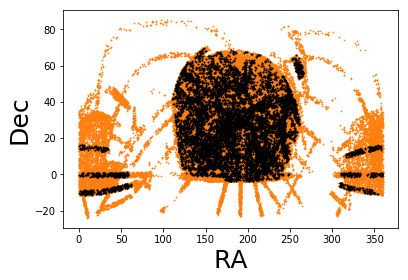

In [26]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(nsa_data.field('ra'), nsa_data.field('dec'), s=0.5, c='C1')
sub.scatter(tinker_ra, tinker_dec, s=1, c='k')
sub.set_xlabel('RA', fontsize=25)
sub.set_ylabel('Dec', fontsize=25)

(10.0, 12.0)

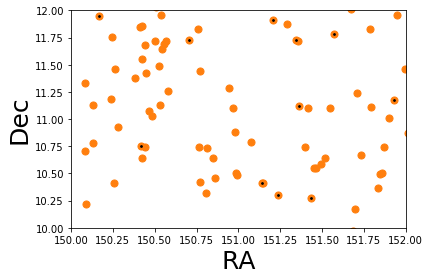

In [30]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.scatter(nsa_data.field('ra'), nsa_data.field('dec'), s=50, c='C1')
sub.scatter(tinker_ra, tinker_dec, s=3, c='k')
sub.set_xlabel('RA', fontsize=25)
sub.set_xlim([150, 152])
sub.set_ylabel('Dec', fontsize=25)
sub.set_ylim([10., 12.])

christ jeremy, you put one decimal place for the $RA$ and $Dec$

(array([ 3.97974949,  5.06676599,  6.24482702, 11.60541853, 19.56491751,
        22.07278044, 25.3903879 , 23.88125586, 25.1917453 , 26.98642609,
        29.974342  ,  0.04138388,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]),
 array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
        0.09 , 0.095, 0.1  ]),
 <a list of 20 Patch objects>)

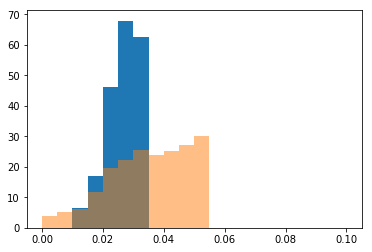

In [31]:
plt.hist(tinker_z, range=(0., 0.1), bins=20, density=True)
plt.hist(nsa_data.field('z'), range=(0., 0.1), bins=20, density=True, alpha=0.5)

In [34]:
match_length = (3 * U.arcsec).to(U.degree)
print('match length = %f degrees'% match_length.value)

match length = 0.000833 degrees


In [36]:
# now lets spherematch the two
m_nsa, m_tinker, dmatch = spherematch(nsa_data.field('ra'), nsa_data.field('dec'), tinker_ra, tinker_dec, 
                                      match_length.value, maxmatch=0)

In [42]:
dz = [] 
for m_tink in np.unique(m_tinker):
    tinktink = (m_tinker == m_tink) 
    if np.sum(tinktink) > 1: raise ValueError

    dz.append(tinker_z[m_tink]-nsa_data.field('z')[m_nsa[tinktink]])

In [44]:
dz = np.array(dz)

Text(0.5,0,'$z_\\mathrm{tinker} - z_\\mathrm{NSA}$')

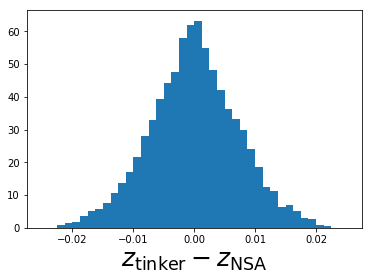

In [50]:
plt.hist(dz, range=(-0.025, 0.025), bins=40, density=True)
plt.xlabel("$z_\mathrm{tinker} - z_\mathrm{NSA}$", fontsize=25)

In [ ]:
for i_tink in range(len(tinker_ra)):
    tinktink = (m_tinker == i_tink) 
    if np.sum(tinktink) > 1: 
        raise ValueError
    elif np.sum(tinktink) == 0: 
        
    else: 

In [38]:
for m_tink in np.unique(m_tinker)[:1000]:
    tinktink = (m_tinker == m_tink) 
    if np.sum(tinktink) > 1: 
        print m_tink
        print('(RA, Dec) = (%f, %f)' % (tinker_ra[m_tink], tinker_dec[m_tink]))
        print([(r, d) for r, d in zip(nsa_data.field('ra')[m_nsa[tinktink]], nsa_data.field('dec')[m_nsa[tinktink]])])
        print tinker_cz[m_tink], tinker_cz[m_tink]/300000., nsa_data.field('z')[m_nsa[tinktink]]
        print nsa_data.field('z')[m_nsa[tinktink]] - (tinker_cz[m_tink]/300000.)